# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [10]:
bond_lengths = np.arange(0.2,2.6,0.15)

In [11]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503227 Eh
E = -0.7892693929052859 Eh
E = -1.0551597946880178 Eh
E = -1.129904784381681 Eh
E = -1.1341476666428472 Eh
E = -1.1113394176484672 Eh
E = -1.0791929448522461 Eh
E = -1.0457831444222823 Eh
E = -1.0154682491653282 Eh
E = -0.9904763408291672 Eh
E = -0.971426688371732 Eh
E = -0.9578329678033493 Eh
E = -0.9486411116370543 Eh
E = -0.9426777856643824 Eh
E = -0.9389223859660623 Eh
E = -0.9366052562828839 Eh


In [13]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411336572 Eh
E = -0.7804765951819675 Eh
E = -1.0430227794889932 Eh
E = -1.1130219048551122 Eh
E = -1.1108742248683532 Eh
E = -1.0796625038961294 Eh
E = -1.036570708427825 Eh
E = -0.9891607220515036 Eh
E = -0.9415475409906798 Eh
E = -0.8961822662584196 Eh
E = -0.8544322638069666 Eh
E = -0.816946041847384 Eh
E = -0.783905229977308 Eh
E = -0.7551875207159404 Eh
E = -0.7304829859611629 Eh
E = -0.7093870573682073 Eh


In [12]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436212 Eh
E = -0.7892684121842475 Eh
E = -1.0551618182707836 Eh
E = -1.129908999968015 Eh
E = -1.1341514464210185 Eh
E = -1.1113400518407912 Eh
E = -1.079186588632932 Eh
E = -1.0457654916005572 Eh
E = -1.015441636439638 Eh
E = -0.9904513730393237 Eh
E = -0.9714134434897822 Eh
E = -0.9578338862044486 Eh
E = -0.9486519411257649 Eh
E = -0.942692099102963 Eh
E = -0.9389349848288219 Eh
E = -0.9366133215018111 Eh


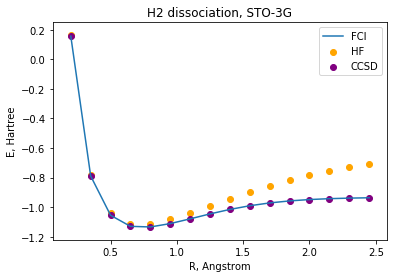

In [15]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## LiH

## H<sub>2</sub>O

## N<sub>2</sub>